In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

In [2]:
train_ds_files=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')

2022-09-03 04:29:19.309977: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
len(train_ds_files)

585

In [4]:
train_labels_ds=pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train_labels_ds.shape

(585, 2)

In [5]:
train_labels_ds.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [6]:
train_labels_ds['BraTS21ID'].unique

<bound method Series.unique of 0         0
1         2
2         3
3         5
4         6
       ... 
580    1005
581    1007
582    1008
583    1009
584    1010
Name: BraTS21ID, Length: 585, dtype: int64>

In [7]:
train_ds_files_00000_FLAIR=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR')
filename=train_ds_files_00000_FLAIR.as_numpy_iterator().next()

In [8]:
ds_flair_000=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/*')
def best_image(ds_paths):
    
    s=0
    filep=''
    for filename in ds_paths.as_numpy_iterator():
        img=pydicom.dcmread(str(filename).split('\'')[1])
        sp=np.array(img.pixel_array).sum()
        if(sp>s):
            s=sp
            filep=str(filename).split('\'')[1]
    #best_img=pydicom.dcmread(filep)
    return filep
    

In [9]:
def image_selection(train_ds_files):
    files_num=[]
    best_flair_images=[]
    best_t1w_images=[]
    best_t1wce_images=[]
    best_t2w_images=[]
    for filename in train_ds_files.as_numpy_iterator():
        path=str(filename).split('\'')[1]
        FLAIR_PATH=path+'/FLAIR/*'
        T1w_PATH=path+'/T1w/*'
        T1wCE_PATH=path+'/T1wCE/*'
        T2w_PATH=path+'/T2w/*'
        ds_files_FLAIR=tf.data.Dataset.list_files(FLAIR_PATH)
        ds_files_T1w=tf.data.Dataset.list_files(T1w_PATH)
        ds_files_T1wCE=tf.data.Dataset.list_files(T1wCE_PATH)
        ds_files_T2w=tf.data.Dataset.list_files(T2w_PATH)
        file_num=path.split('/')[-1]
        files_num.append(file_num)
        best_flair_images.append(best_image(ds_files_FLAIR))
        best_t1w_images.append(best_image(ds_files_T1w))
        best_t1wce_images.append(best_image(ds_files_T1wCE))
        best_t2w_images.append(best_image(ds_files_T2w))
    return files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images

In [10]:
ds_train_files=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')
files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images=image_selection(ds_train_files.take(2))
best_flair_images

['../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00601/FLAIR/Image-74.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00494/FLAIR/Image-71.dcm']

46026545


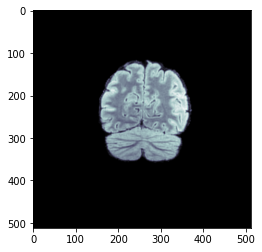

In [11]:

ds = pydicom.dcmread('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/Image-108.dcm')
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 